In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/immigration-to-canada/canadian_immegration_data.csv


# Reading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/immigration-to-canada/canadian_immegration_data.csv')
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [3]:
df.shape

(195, 39)

# Checking for null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

# Drop duplicates rows and keep order "in place"

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


# Yearly Immigration per country
Idea is to find the number of people that immigrated to Canada yearly from 1980 to 2013 per country

In [7]:
yearly_immigration = df.loc[:,'1980':'2013']
total_per_year = yearly_immigration.sum()


# Preparing data to Visualize

In [8]:
x = total_per_year.index
y = total_per_year.values


<BarContainer object of 34 artists>

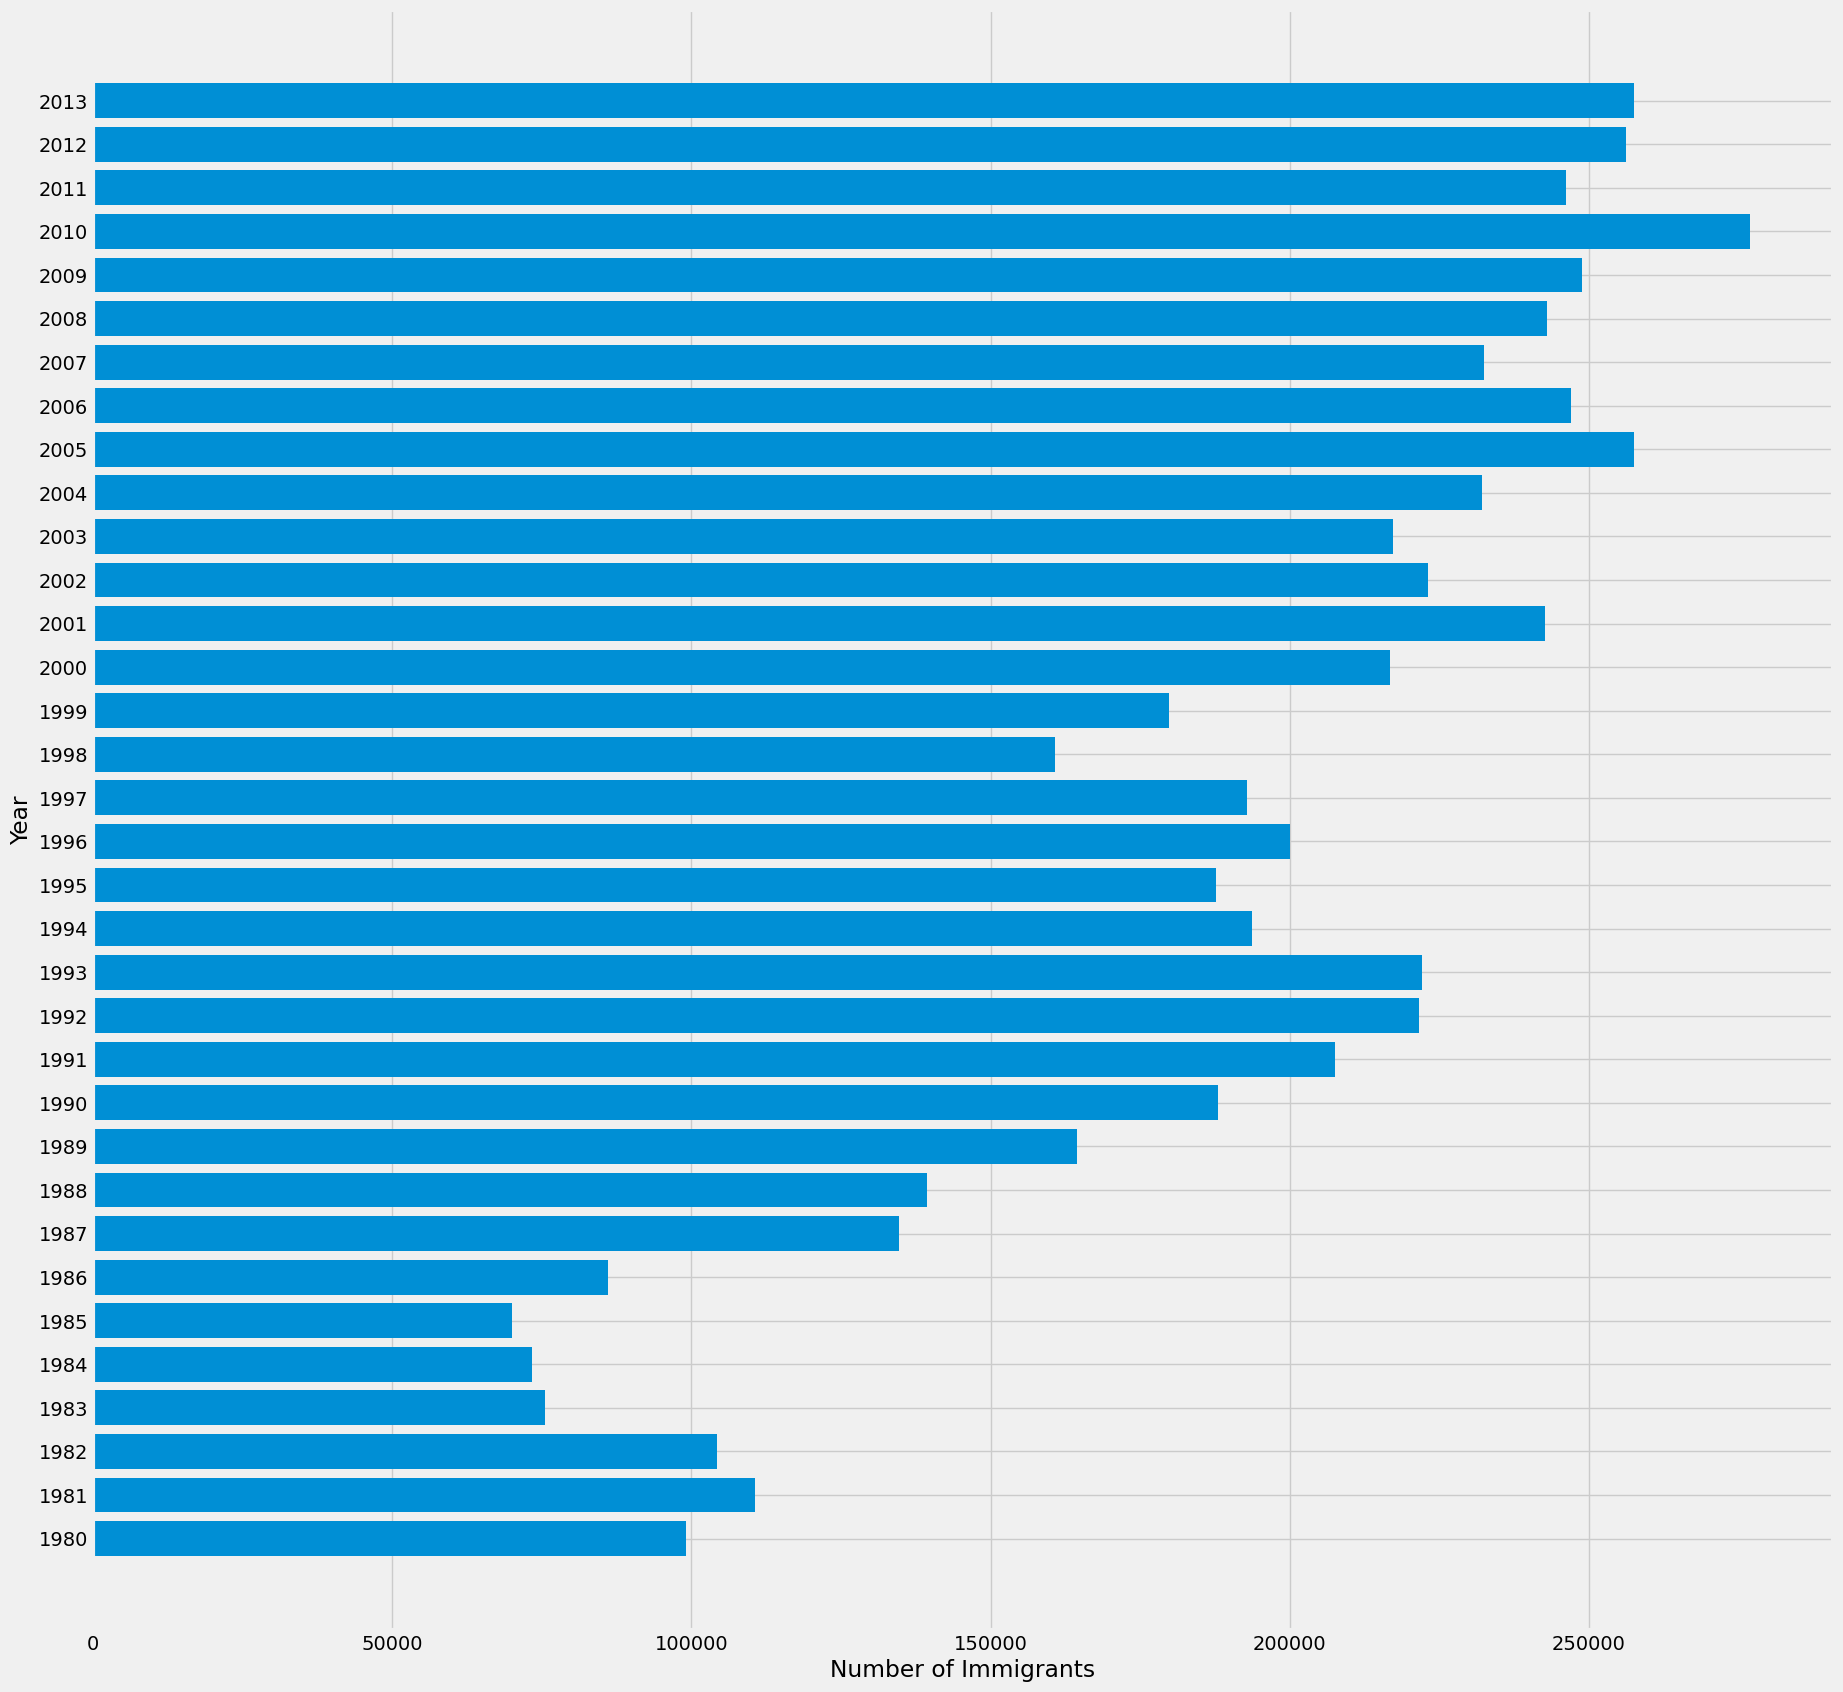

In [9]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,20))

plt.xlabel('Number of Immigrants')
plt.ylabel('Year')

ax.barh(x,y)


# Explanation
From the bar plot, Immigration was at its lowest in 1984 and at its peak in 2010. Those years need further investigation

# Continent Distribution
Determining the continent distribution of over the 34 year period of the dataset

In [10]:
continents = df['Continent'].unique()
continents

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

In [11]:
get_count = lambda x,y : df.loc[df[y] == x].shape[0]
data = []
for c in continents: 
    data.append([c , get_count(c,'Continent')])
df_con = pd.DataFrame(data, columns=['Continents', 'Number_Imm'])
df_con

,Continents,Number_Imm
0,Asia,49
1,Europe,43
2,Africa,54
3,Oceania,14
4,Latin America and the Caribbean,33
5,Northern America,2


Text(0.5, 1.0, 'Continents Distribution')

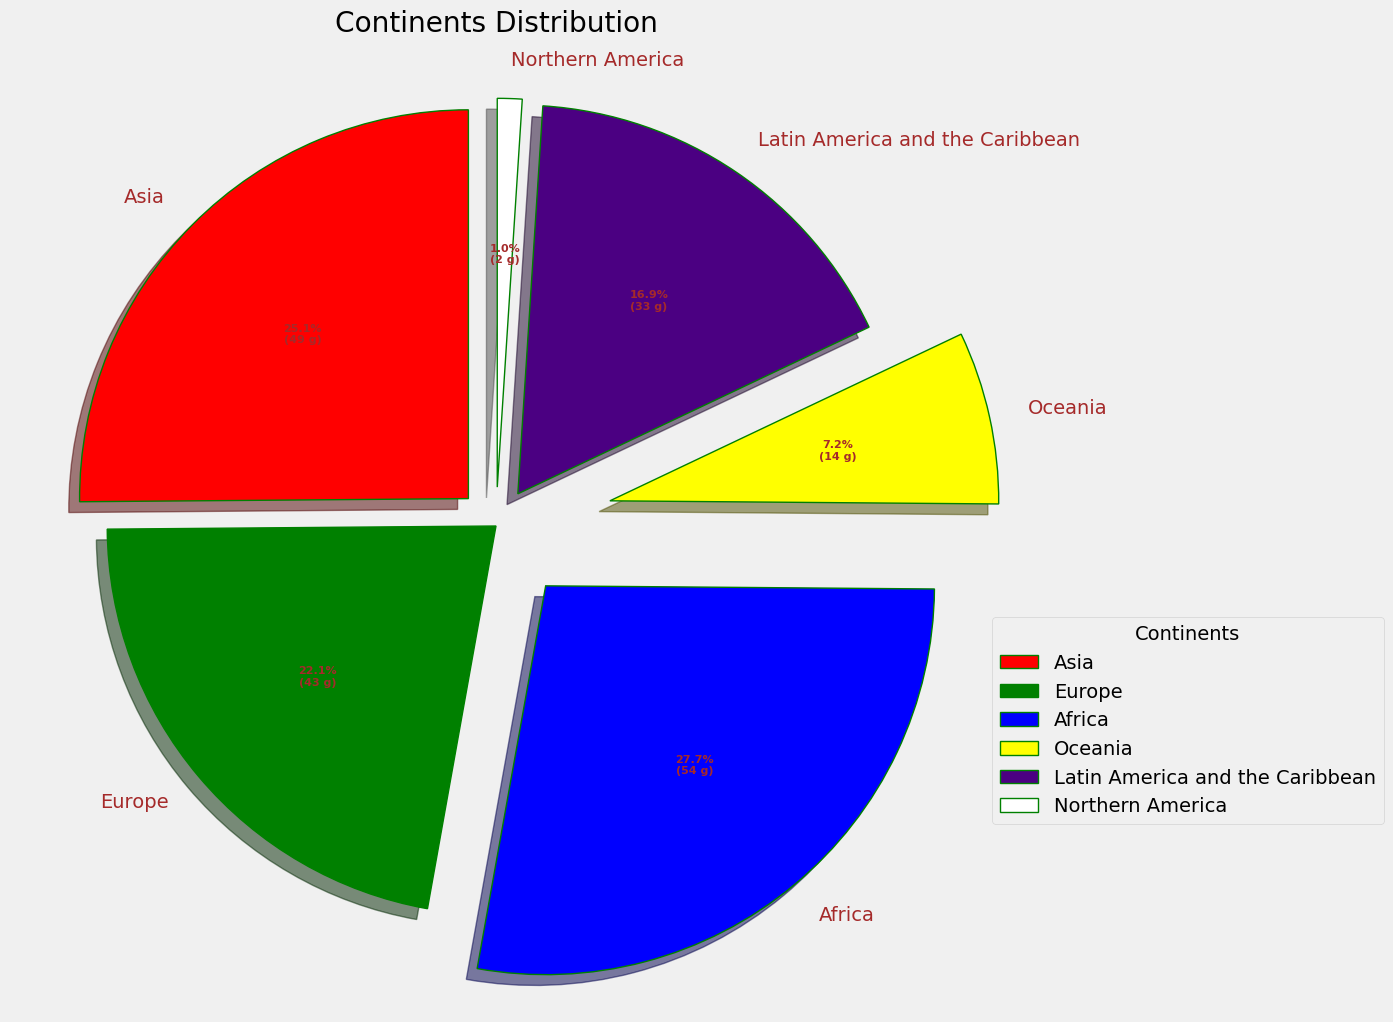

In [12]:
colors = ( "red", "green", "blue",
          "yellow", "indigo", "white")
explode = (0.1, 0.0, 0.2, 0.3, 0.1, 0.1)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(15, 12))
wedges, texts, autotexts = ax.pie(df_con['Number_Imm'], 
                                  autopct = lambda pct: func(pct, df_con['Number_Imm']),
                                  explode = explode, 
                                  labels = df_con['Continents'],
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="brown"))
 
# Adding legend
ax.legend(wedges, df_con['Continents'],
          title ="Continents",
          loc ="center left",
          bbox_to_anchor =(1, -0.2, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Continents Distribution")

# Developed vs Developing Regions
Question : Where do Immigrants mostly come from ? 

Developed or Developing countries ?


In [13]:
dev_Name = df['DevName'].unique()
dev_Name

array(['Developing regions', 'Developed regions'], dtype=object)

In [14]:
devName = []
for d in dev_Name: 
    devName.append([d , get_count(d,'DevName')])
df_dev = pd.DataFrame(devName, columns=['DevName', 'DevNum'])
df_dev

,DevName,DevNum
0,Developing regions,147
1,Developed regions,48


<BarContainer object of 2 artists>

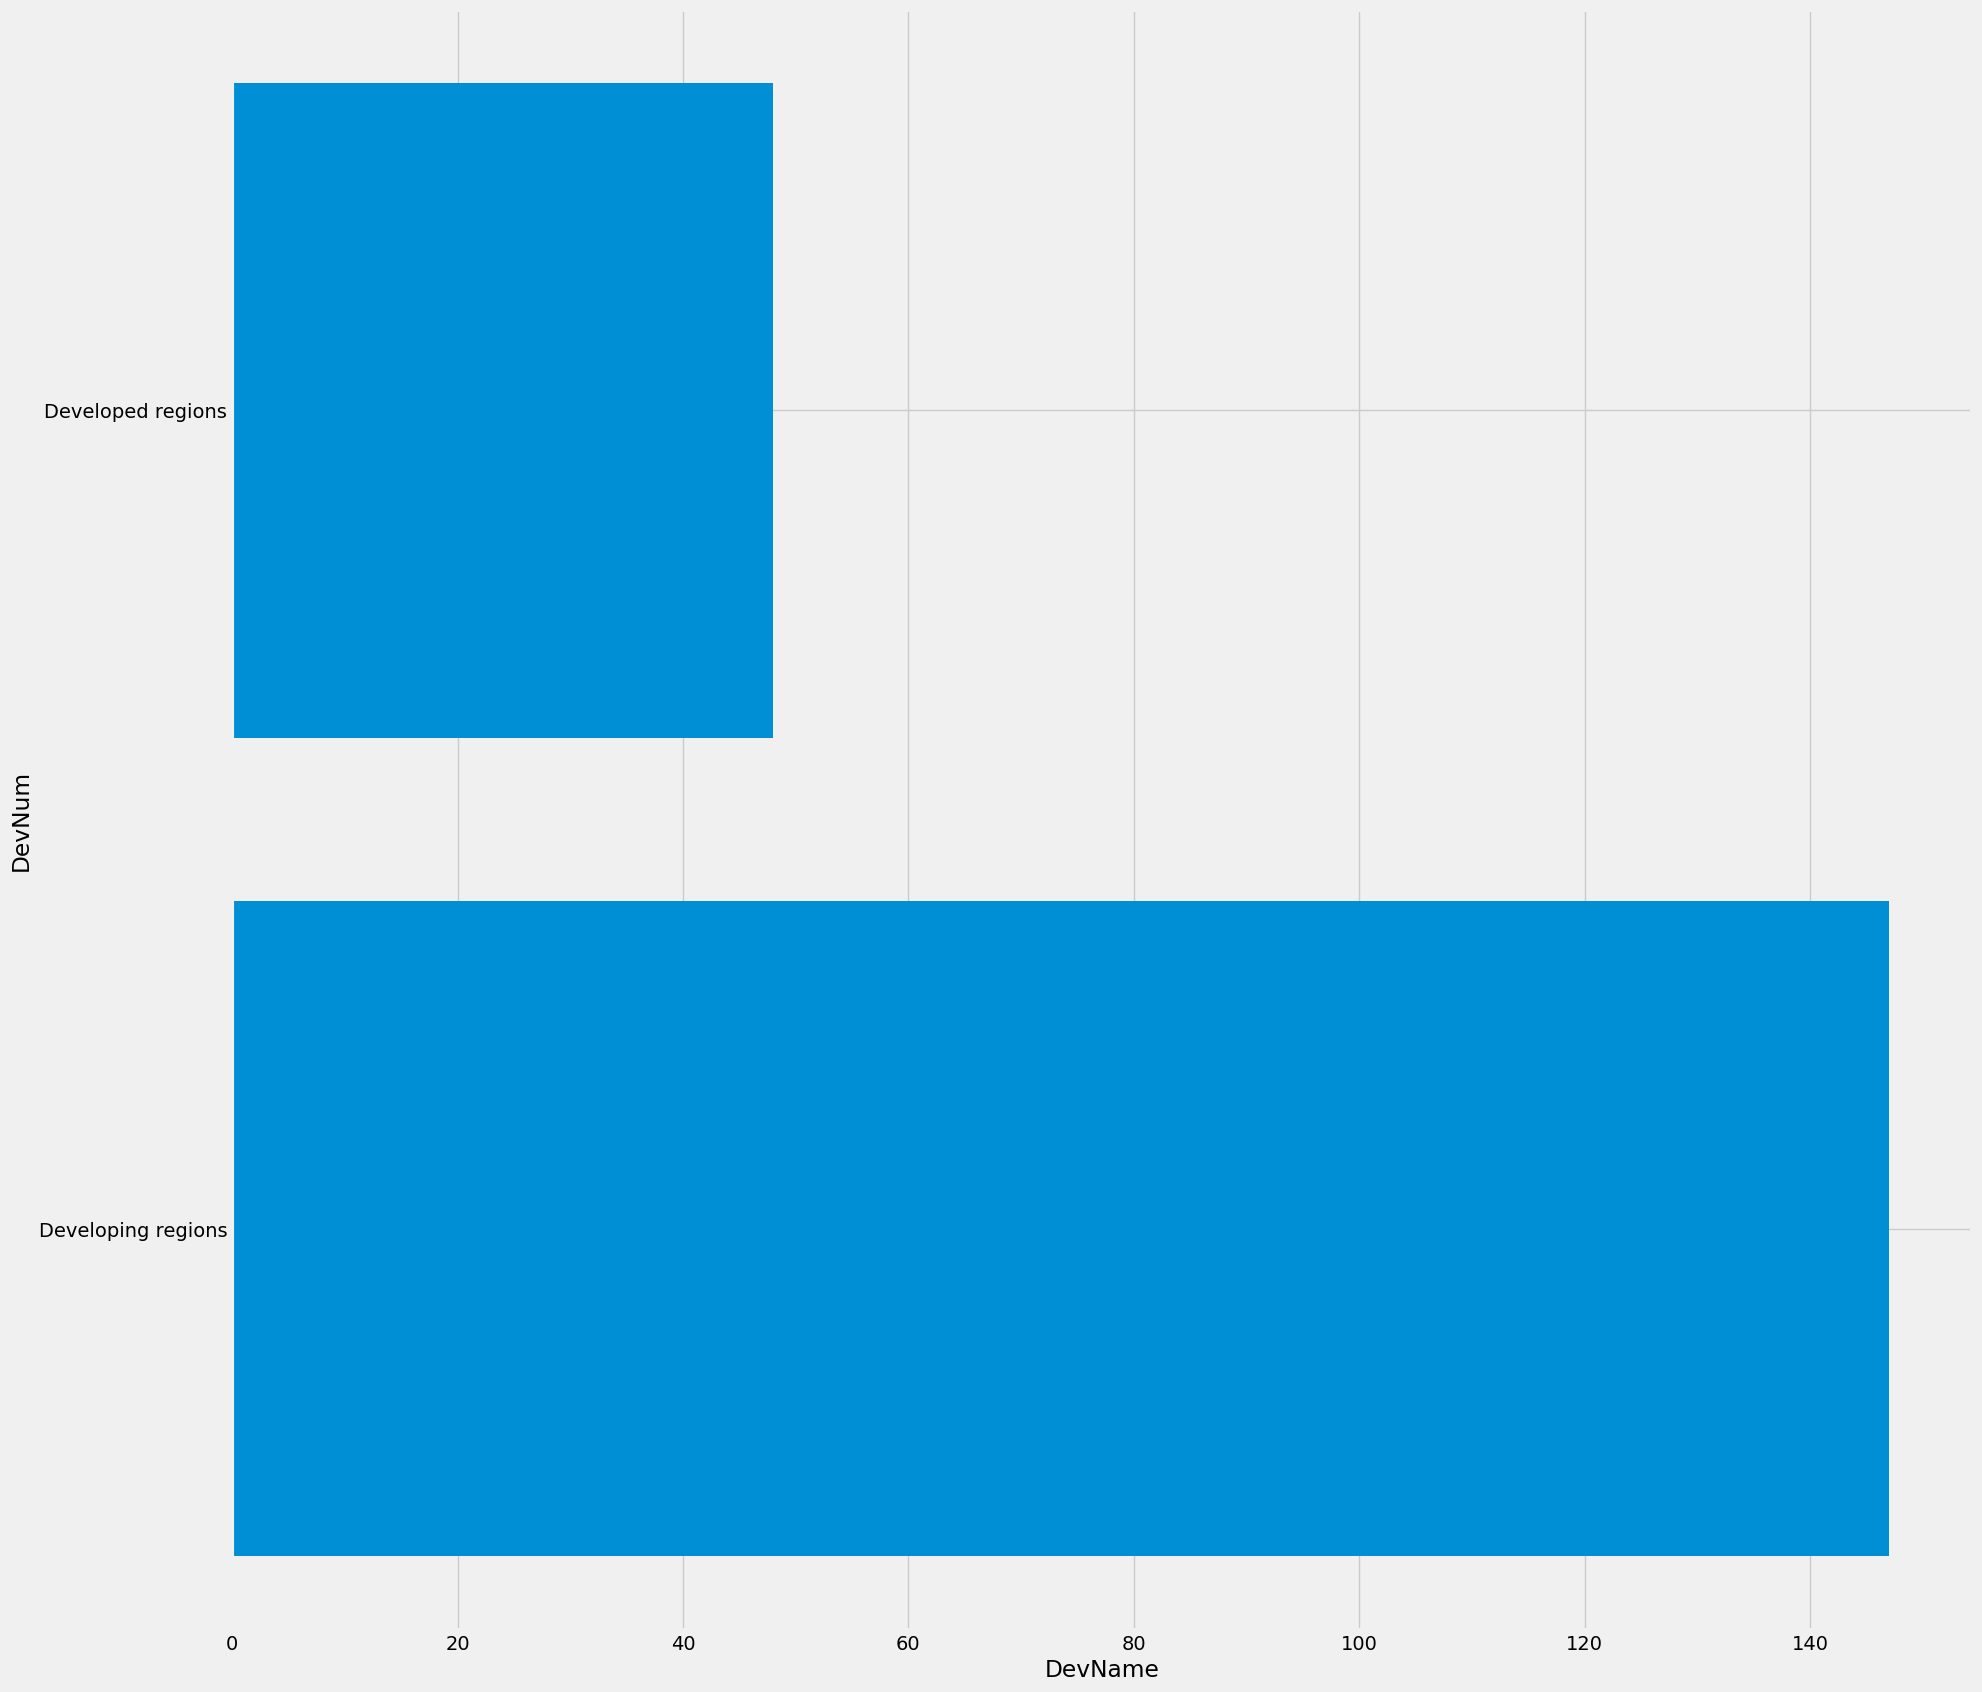

In [15]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,20))

plt.xlabel('DevName')
plt.ylabel('DevNum')

ax.barh(df_dev['DevName'],df_dev['DevNum'])